# **Sistem Prediksi Mahasiswa Berisiko Tinggi Drop Out - Kelompok 5**

### Anggota Kelompok
1. Attiya Dianti Fadli (G1A022002)  
2. Tiesya Andriani Ramadhanti (G1A022014)  
3. Imelda Cyntia (G1A022022)  


# **Import Library**

In [ ]:
# 1. Data & EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# 3. Modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import math

# **Data Understanding**

## Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_mahasiswa_500.csv to dataset_mahasiswa_500.csv


In [ ]:
mahasiswa_df = pd.read_csv('/content/dataset_mahasiswa_500.csv')

## Menampilkan informasi dataset

In [ ]:
print("Mahasiswa Data Head:")
# Menampilkan beberapa baris pertama sebagai cek
mahasiswa_df

Mahasiswa Data Head:


,nim,ipk_semester_1,ipk_semester_2,ipk_semester_3,ipk_semester_4,ipk_semester_5,ipk_semester_6,ipk_semester_7,ipk_semester_8,kehadiran_basis_data,...,machine_learning_ulang,frekuensi_login_lms,waktu_akses_materi,partisipasi_forum,status_pekerjaan,jam_kerja_per_minggu,penghasilan_orang_tua,jumlah_tanggungan_keluarga,beasiswa,status_do
0,G1A018001,2.75,3.40,2.37,3.04,2.52,3.66,3.35,2.57,82.9,...,2,28,6.9,22,paruh_waktu,45,19585069,6,ya,0
1,G1A018002,3.90,3.07,3.08,2.96,2.49,3.53,3.59,3.61,92.2,...,0,21,19.9,7,full_time,4,16158830,6,ya,0
2,G1A018003,3.46,2.62,3.75,2.05,3.81,3.15,2.50,3.99,90.4,...,2,26,15.4,23,tidak_bekerja,57,10311487,3,tidak,0
3,G1A018004,3.20,3.63,3.46,2.68,2.50,3.91,3.25,2.06,66.2,...,1,9,15.2,13,paruh_waktu,59,15244799,2,tidak,0
4,G1A018005,2.31,3.37,3.61,2.76,2.54,2.40,3.14,3.79,66.0,...,0,15,19.1,5,tidak_bekerja,23,15262957,3,tidak,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,G1A022096,2.71,2.18,3.34,3.31,2.98,3.73,2.42,2.88,84.4,...,1,22,17.4,3,paruh_waktu,53,8694852,6,tidak,0
496,G1A022097,3.17,3.83,3.24,3.91,3.15,2.31,3.73,2.67,79.5,...,0,43,13.7,0,paruh_waktu,47,19523875,5,ya,0
497,G1A022098,2.16,2.27,2.93,2.14,3.73,2.62,3.77,2.79,65.3,...,2,37,2.2,12,tidak_bekerja,34,5940952,5,ya,0
498,G1A022099,3.95,3.90,2.76,2.11,3.96,2.58,2.39,3.06,70.5,...,0,58,3.0,23,paruh_waktu,31,14689610,4,tidak,0


Dataset berisi 500 mahasiswa dengan 28 fitur, mencakup data akademik, aktivitas digital, dan sosial ekonomi. Target prediksi adalah status_do, yang menunjukkan apakah mahasiswa berisiko Drop Out. Data ini memberikan informasi yang cukup untuk membangun model prediksi risiko DO.

In [ ]:
mahasiswa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nim                           500 non-null    object 
 1   ipk_semester_1                500 non-null    float64
 2   ipk_semester_2                500 non-null    float64
 3   ipk_semester_3                500 non-null    float64
 4   ipk_semester_4                500 non-null    float64
 5   ipk_semester_5                500 non-null    float64
 6   ipk_semester_6                500 non-null    float64
 7   ipk_semester_7                500 non-null    float64
 8   ipk_semester_8                500 non-null    float64
 9   kehadiran_basis_data          500 non-null    float64
 10  kehadiran_pemrograman_web     500 non-null    float64
 11  kehadiran_kalkulus            500 non-null    float64
 12  kehadiran_matematika_diskrit  500 non-null    float64
 13  kehad

Dataset terdiri dari 500 entri tanpa missing value dengan total 28 kolom. Sebagian besar fitur bertipe numerik (`float64` dan `int64`), seperti IPK, kehadiran, dan aktivitas mahasiswa, sementara fitur kategorikal meliputi `nim`, `status_pekerjaan`, dan `beasiswa`. Data sudah bersih dan siap untuk tahap preprocessing dan pemodelan.

In [ ]:
mahasiswa_df.describe()

,ipk_semester_1,ipk_semester_2,ipk_semester_3,ipk_semester_4,ipk_semester_5,ipk_semester_6,ipk_semester_7,ipk_semester_8,kehadiran_basis_data,kehadiran_pemrograman_web,...,kalkulus_ulang,matematika_diskrit_ulang,machine_learning_ulang,frekuensi_login_lms,waktu_akses_materi,partisipasi_forum,jam_kerja_per_minggu,penghasilan_orang_tua,jumlah_tanggungan_keluarga,status_do
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000
mean,2.997060,2.963540,3.035000,2.992780,2.999520,3.010000,2.995900,2.965720,79.493200,80.036200,...,0.964000,0.920000,1.032000,30.478000,9.922400,12.108000,29.998000,1.012435e+07,3.468000,0.204000
std,0.597247,0.571054,0.594669,0.574022,0.571716,0.591623,0.566017,0.580326,11.314291,11.636142,...,0.827087,0.838455,0.824825,17.460563,5.850877,7.278344,17.834071,5.410783e+06,1.763859,0.403373
min,2.010000,2.010000,2.010000,2.010000,2.000000,2.000000,2.000000,2.000000,60.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.022873e+06,1.000000,0.000000
25%,2.480000,2.460000,2.480000,2.480000,2.535000,2.520000,2.500000,2.460000,69.600000,69.900000,...,0.000000,0.000000,0.000000,16.000000,5.200000,6.000000,14.750000,5.264799e+06,2.000000,0.000000
50%,3.025000,2.940000,3.080000,3.020000,2.995000,3.005000,3.040000,2.920000,80.000000,79.500000,...,1.000000,1.000000,1.000000,30.000000,9.800000,12.000000,30.000000,1.025660e+07,3.000000,0.000000
75%,3.512500,3.452500,3.552500,3.470000,3.490000,3.540000,3.452500,3.500000,87.925000,90.400000,...,2.000000,2.000000,2.000000,46.250000,15.100000,18.000000,46.000000,1.463549e+07,5.000000,0.000000
max,3.990000,4.000000,4.000000,4.000000,3.990000,4.000000,4.000000,4.000000,99.900000,99.900000,...,2.000000,2.000000,2.000000,59.000000,20.000000,24.000000,60.000000,1.996562e+07,6.000000,1.000000


Berdasarkan data deskriptif mahasiswa, rata-rata IPK dari semester 1 hingga 8 berkisar antara 2.96 hingga 3.03, dengan rentang nilai dari 2.00 hingga 4.00. Ini menunjukkan bahwa sebagian besar mahasiswa memiliki performa akademik yang cukup stabil, meskipun terdapat variasi yang cukup besar antar individu. Kehadiran dalam mata kuliah seperti Basis Data dan Pemrograman Web cukup tinggi, dengan rata-rata sekitar 80%, yang mengindikasikan komitmen mahasiswa terhadap perkuliahan tatap muka. Aktivitas pembelajaran daring melalui LMS juga cukup aktif, dengan rata-rata 30 kali login, hampir 10 jam waktu akses materi, dan 12 kali partisipasi di forum. Namun, terdapat juga mahasiswa yang sama sekali tidak aktif (nilai minimum 0), yang bisa menjadi indikator kurangnya keterlibatan dalam pembelajaran digital.

Selain aspek akademik, data menunjukkan bahwa mahasiswa menghadapi tantangan non-akademik yang signifikan. Sebagian mahasiswa harus mengulang mata kuliah seperti Kalkulus, Matematika Diskrit, dan Machine Learning, dengan rata-rata pengulangan sekitar 1 kali. Rata-rata jam kerja mahasiswa mencapai 30 jam per minggu, yang merupakan beban cukup besar dan berpotensi mengganggu studi. Penghasilan orang tua bervariasi luas, dengan rata-rata sekitar 10 juta rupiah, menunjukkan keberagaman latar belakang ekonomi mahasiswa. Sebagian besar mahasiswa tidak mengalami drop out, dengan tingkat DO sebesar 20,4%. Data ini menunjukkan perlunya perhatian lebih pada dukungan akademik dan kesejahteraan mahasiswa, khususnya bagi mereka yang bekerja sambil kuliah atau berasal dari keluarga dengan penghasilan lebih rendah.


In [ ]:
mahasiswa_df.isnull().sum()

,0
nim,0
ipk_semester_1,0
ipk_semester_2,0
ipk_semester_3,0
ipk_semester_4,0
ipk_semester_5,0
ipk_semester_6,0
ipk_semester_7,0
ipk_semester_8,0
kehadiran_basis_data,0


Data mahasiswa tidak memiliki nilai kosong (missing values) pada seluruh kolom.

In [ ]:
mahasiswa_df.duplicated().sum()

0

Dataset tidak mengandung data duplikat, yang berarti setiap entri mahasiswa bersifat unik.

# **Univariate Data Analysis**

## Memisahkan kolom kategorikal dan kolom numerik

In [ ]:
# Memisahkan kolom berdasarkan tipe datanya
categorical_columns = mahasiswa_df.select_dtypes(include=['object']).columns
numerical_columns = mahasiswa_df.select_dtypes(include=['int64', 'float64']).columns

# Menampilkan nama-nama kolom berdasarkan tipe data
print("Kolom kategorikal:", list(categorical_columns))
print("Kolom numerikal:", list(numerical_columns))

Kolom kategorikal: ['nim', 'status_pekerjaan', 'beasiswa']
Kolom numerikal: ['ipk_semester_1', 'ipk_semester_2', 'ipk_semester_3', 'ipk_semester_4', 'ipk_semester_5', 'ipk_semester_6', 'ipk_semester_7', 'ipk_semester_8', 'kehadiran_basis_data', 'kehadiran_pemrograman_web', 'kehadiran_kalkulus', 'kehadiran_matematika_diskrit', 'kehadiran_machine_learning', 'basis_data_ulang', 'pemrograman_web_ulang', 'kalkulus_ulang', 'matematika_diskrit_ulang', 'machine_learning_ulang', 'frekuensi_login_lms', 'waktu_akses_materi', 'partisipasi_forum', 'jam_kerja_per_minggu', 'penghasilan_orang_tua', 'jumlah_tanggungan_keluarga', 'status_do']


Dataset terdiri dari 3 kolom kategorikal yaitu `nim`, `status_pekerjaan`, dan `beasiswa`, serta 25 kolom numerikal yang mencakup IPK tiap semester, kehadiran, pengulangan mata kuliah, aktivitas pembelajaran daring, kondisi sosial ekonomi, dan status DO. Ini menunjukkan bahwa mayoritas data bersifat kuantitatif dan siap untuk analisis statistik lebih lanjut.


In [ ]:
print("Jumlah NIM unik:", mahasiswa_df['nim'].nunique())
print("Jumlah total data:", len(mahasiswa_df))


Jumlah NIM unik: 500
Jumlah total data: 500


Setiap baris data mewakili satu mahasiswa yang unik, ditunjukkan oleh 500 NIM unik dari total 500 data.

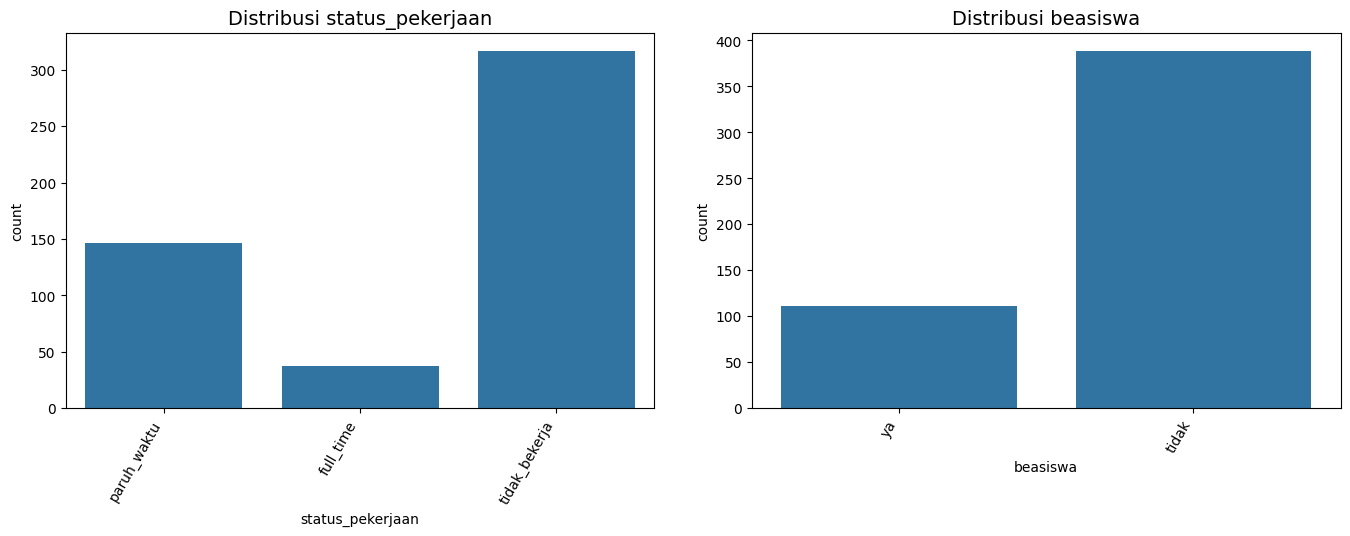

In [ ]:
categorical_columns = mahasiswa_df.select_dtypes(include='object').columns.tolist()

# Hapus kolom yang tidak relevan untuk visualisasi kategorikal
if 'nim' in categorical_columns:
    categorical_columns.remove('nim')

n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

plt.figure(figsize=(n_cols * 7, n_rows * 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=mahasiswa_df, x=col)
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xticks(rotation=60, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout(pad=3)
plt.show()


Berdasarkan visualisasi distribusi data kategorikal:

* Mayoritas mahasiswa tidak bekerja, disusul oleh yang bekerja paruh waktu, sedangkan yang full time sangat sedikit.
* Sebagian besar mahasiswa tidak menerima beasiswa, hanya sebagian kecil yang mendapatkan.

Hal ini menunjukkan bahwa sebagian besar mahasiswa fokus pada studi tanpa tanggungan kerja atau dukungan finansial tambahan.


## Analisis Variabel Kategorikal


=== ANALISIS UNTUK STATUS_PEKERJAAN ===
status_pekerjaan
tidak_bekerja    0.634
paruh_waktu      0.292
full_time        0.074
Name: proportion, dtype: float64


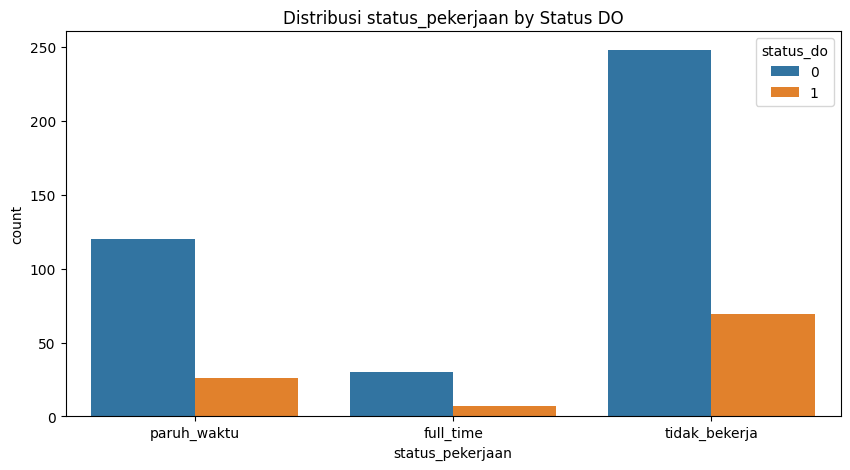


=== ANALISIS UNTUK BEASISWA ===
beasiswa
tidak    0.778
ya       0.222
Name: proportion, dtype: float64


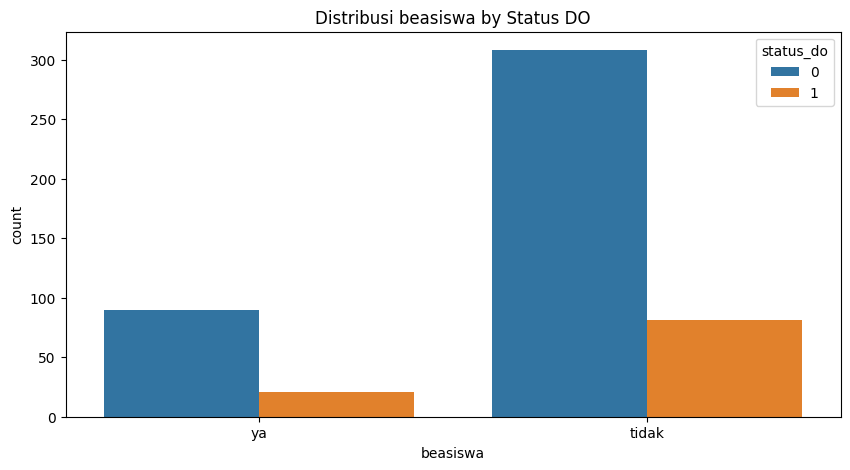

In [ ]:
# Pilih kolom kategorikal
categorical_columns = ['status_pekerjaan', 'beasiswa']

# Analisis untuk setiap variabel kategorikal
for col in categorical_columns:
    print(f"\n=== ANALISIS UNTUK {col.upper()} ===")
    print(mahasiswa_df[col].value_counts(normalize=True))

    # Visualisasi
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='status_do', data=mahasiswa_df)
    plt.title(f'Distribusi {col} by Status DO')
    plt.show()

Berikut adalah insight dari analisis dua variabel kategorikal terhadap status DO:

a) Status Pekerjaan
* Mayoritas mahasiswa tidak bekerja (63.4%), diikuti oleh paruh waktu (29.2%), dan full-time (7.4%).

Dari grafik:

* Mahasiswa yang tidak bekerja mendominasi jumlah yang mengalami DO.

* Mahasiswa paruh waktu dan full-time cenderung memiliki proporsi DO lebih kecil.

Insight: Bekerja, terutama paruh waktu, tampaknya tidak meningkatkan risiko DO secara signifikan. Sebaliknya, mahasiswa yang tidak bekerja justru lebih banyak yang DO, mungkin karena kurangnya keterampilan manajemen waktu atau motivasi.

b) Beasiswa
Hanya 22.2% mahasiswa yang menerima beasiswa.

Dari grafik:

* Proporsi mahasiswa tanpa beasiswa jauh lebih banyak mengalami DO.

* Mahasiswa penerima beasiswa cenderung lebih sedikit yang DO.

Insight: Beasiswa mungkin menjadi faktor protektif terhadap DO, kemungkinan karena seleksi penerimaan beasiswa yang mempertimbangkan prestasi dan komitmen belajar.

## Analisis Variabel Numerik

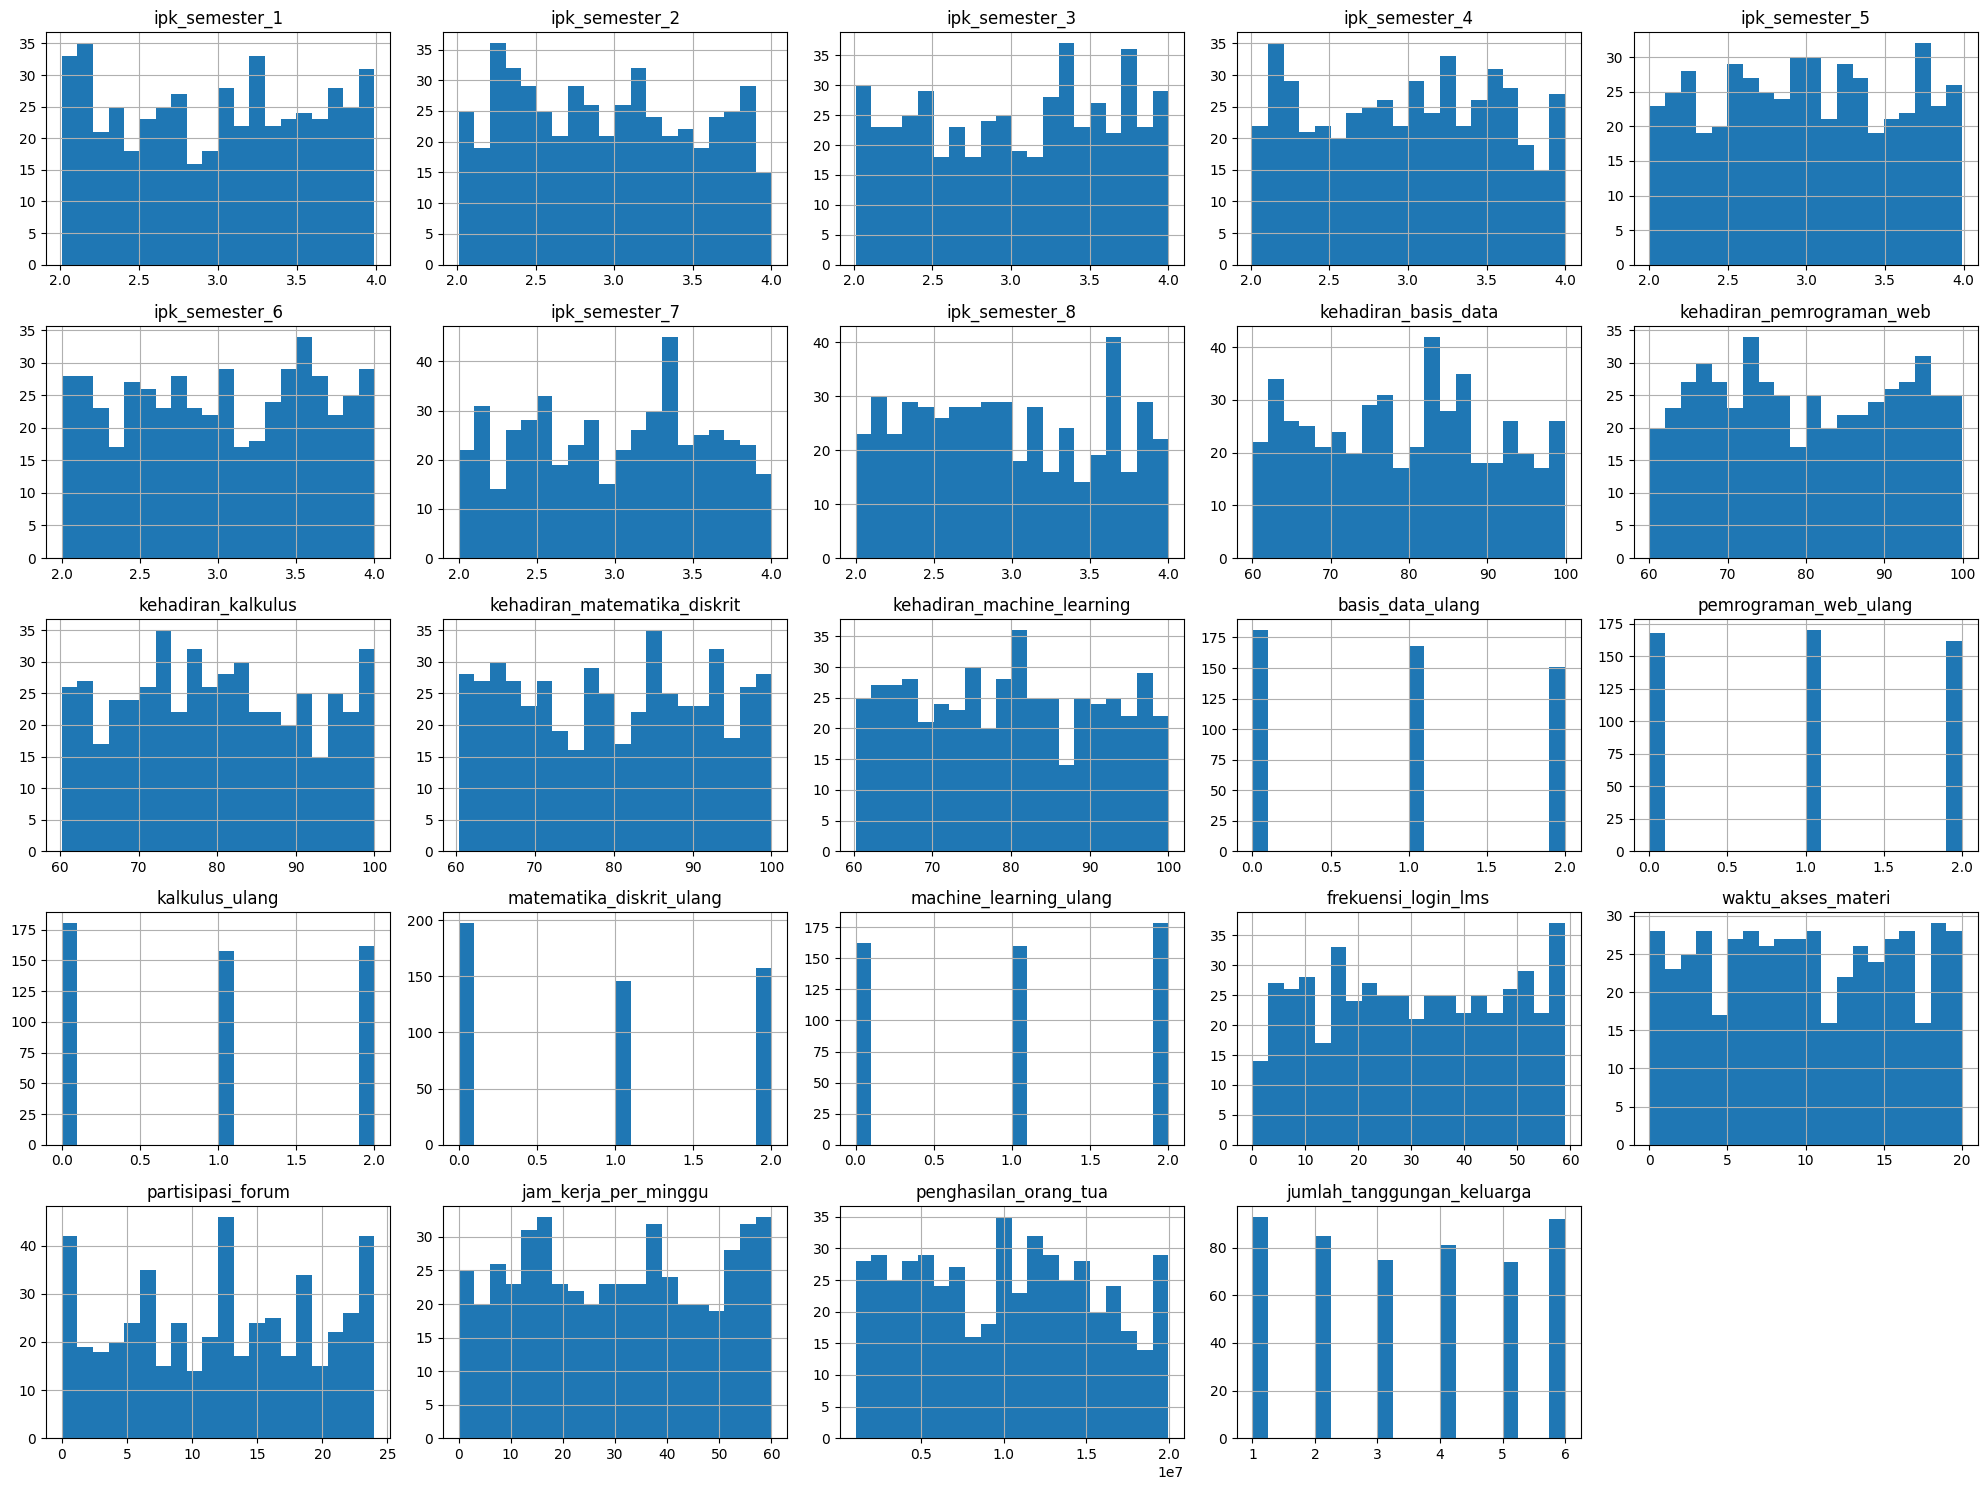

In [ ]:
# Pilih kolom numerik
numerical_columns = mahasiswa_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('status_do')  # Hapus target dari analisis

# Histogram untuk semua variabel numerik
mahasiswa_df[numerical_columns].hist(bins=20, figsize=(20,15))
plt.tight_layout()
plt.show()


Berikut insight berdasarkan histogram variabel numerik:

1. IPK per Semester (ipk\_semester\_1 hingga ipk\_semester\_8):

   * Sebagian besar IPK berkisar antara 2,0 hingga 4,0.
   * Distribusi cukup merata, tetapi cenderung banyak mahasiswa memiliki IPK di atas 3,0, terutama pada semester akhir.

2. Kehadiran Mata Kuliah:

   * Rentang kehadiran antara 60% hingga 100%.
   * Banyak mahasiswa memiliki tingkat kehadiran tinggi (di atas 80%), tetapi masih ada yang cukup rendah di beberapa mata kuliah.

3. Data Remedial (misalnya: basis\_data\_ulang, kalkulus\_ulang):

   * Mayoritas mahasiswa tidak mengulang (nilai 0 dominan), tapi tetap ada kelompok signifikan yang mengulang 1–2 kali.

4. Aktivitas LMS (frekuensi\_login\_lms, waktu\_akses\_materi):

   * Login LMS bervariasi, tetapi distribusi menunjukkan banyak mahasiswa yang login cukup sering.
   * Waktu akses materi rata-rata merata, menunjukkan keterlibatan yang cukup baik.

5. Partisipasi Forum:

   * Terdistribusi luas antara 0 hingga 25 partisipasi.
   * Banyak mahasiswa berpartisipasi secara aktif.

6. Jam Kerja per Minggu:

   * Tersebar antara 0 hingga 60 jam, namun konsentrasi utama berada di bawah 30 jam.
   * Mahasiswa bekerja paruh waktu cukup banyak.

7. Penghasilan Orang Tua:

   * Rentang cukup luas, menunjukkan keragaman latar belakang ekonomi mahasiswa.

8. Jumlah Tanggungan Keluarga:

   * Umumnya memiliki 1–6 tanggungan.

Sebagian besar mahasiswa menunjukkan performa akademik dan partisipasi yang baik, meskipun terdapat sebagian yang berjuang dengan kehadiran, pengulangan mata kuliah, dan faktor ekonomi.


ipk_semester_1: 0 outliers
ipk_semester_2: 0 outliers
ipk_semester_3: 0 outliers
ipk_semester_4: 0 outliers
ipk_semester_5: 0 outliers
ipk_semester_6: 0 outliers
ipk_semester_7: 0 outliers
ipk_semester_8: 0 outliers
kehadiran_basis_data: 0 outliers
kehadiran_pemrograman_web: 0 outliers
kehadiran_kalkulus: 0 outliers
kehadiran_matematika_diskrit: 0 outliers
kehadiran_machine_learning: 0 outliers
basis_data_ulang: 0 outliers
pemrograman_web_ulang: 0 outliers
kalkulus_ulang: 0 outliers
matematika_diskrit_ulang: 0 outliers
machine_learning_ulang: 0 outliers
frekuensi_login_lms: 0 outliers
waktu_akses_materi: 0 outliers
partisipasi_forum: 0 outliers
jam_kerja_per_minggu: 0 outliers
penghasilan_orang_tua: 0 outliers
jumlah_tanggungan_keluarga: 0 outliers


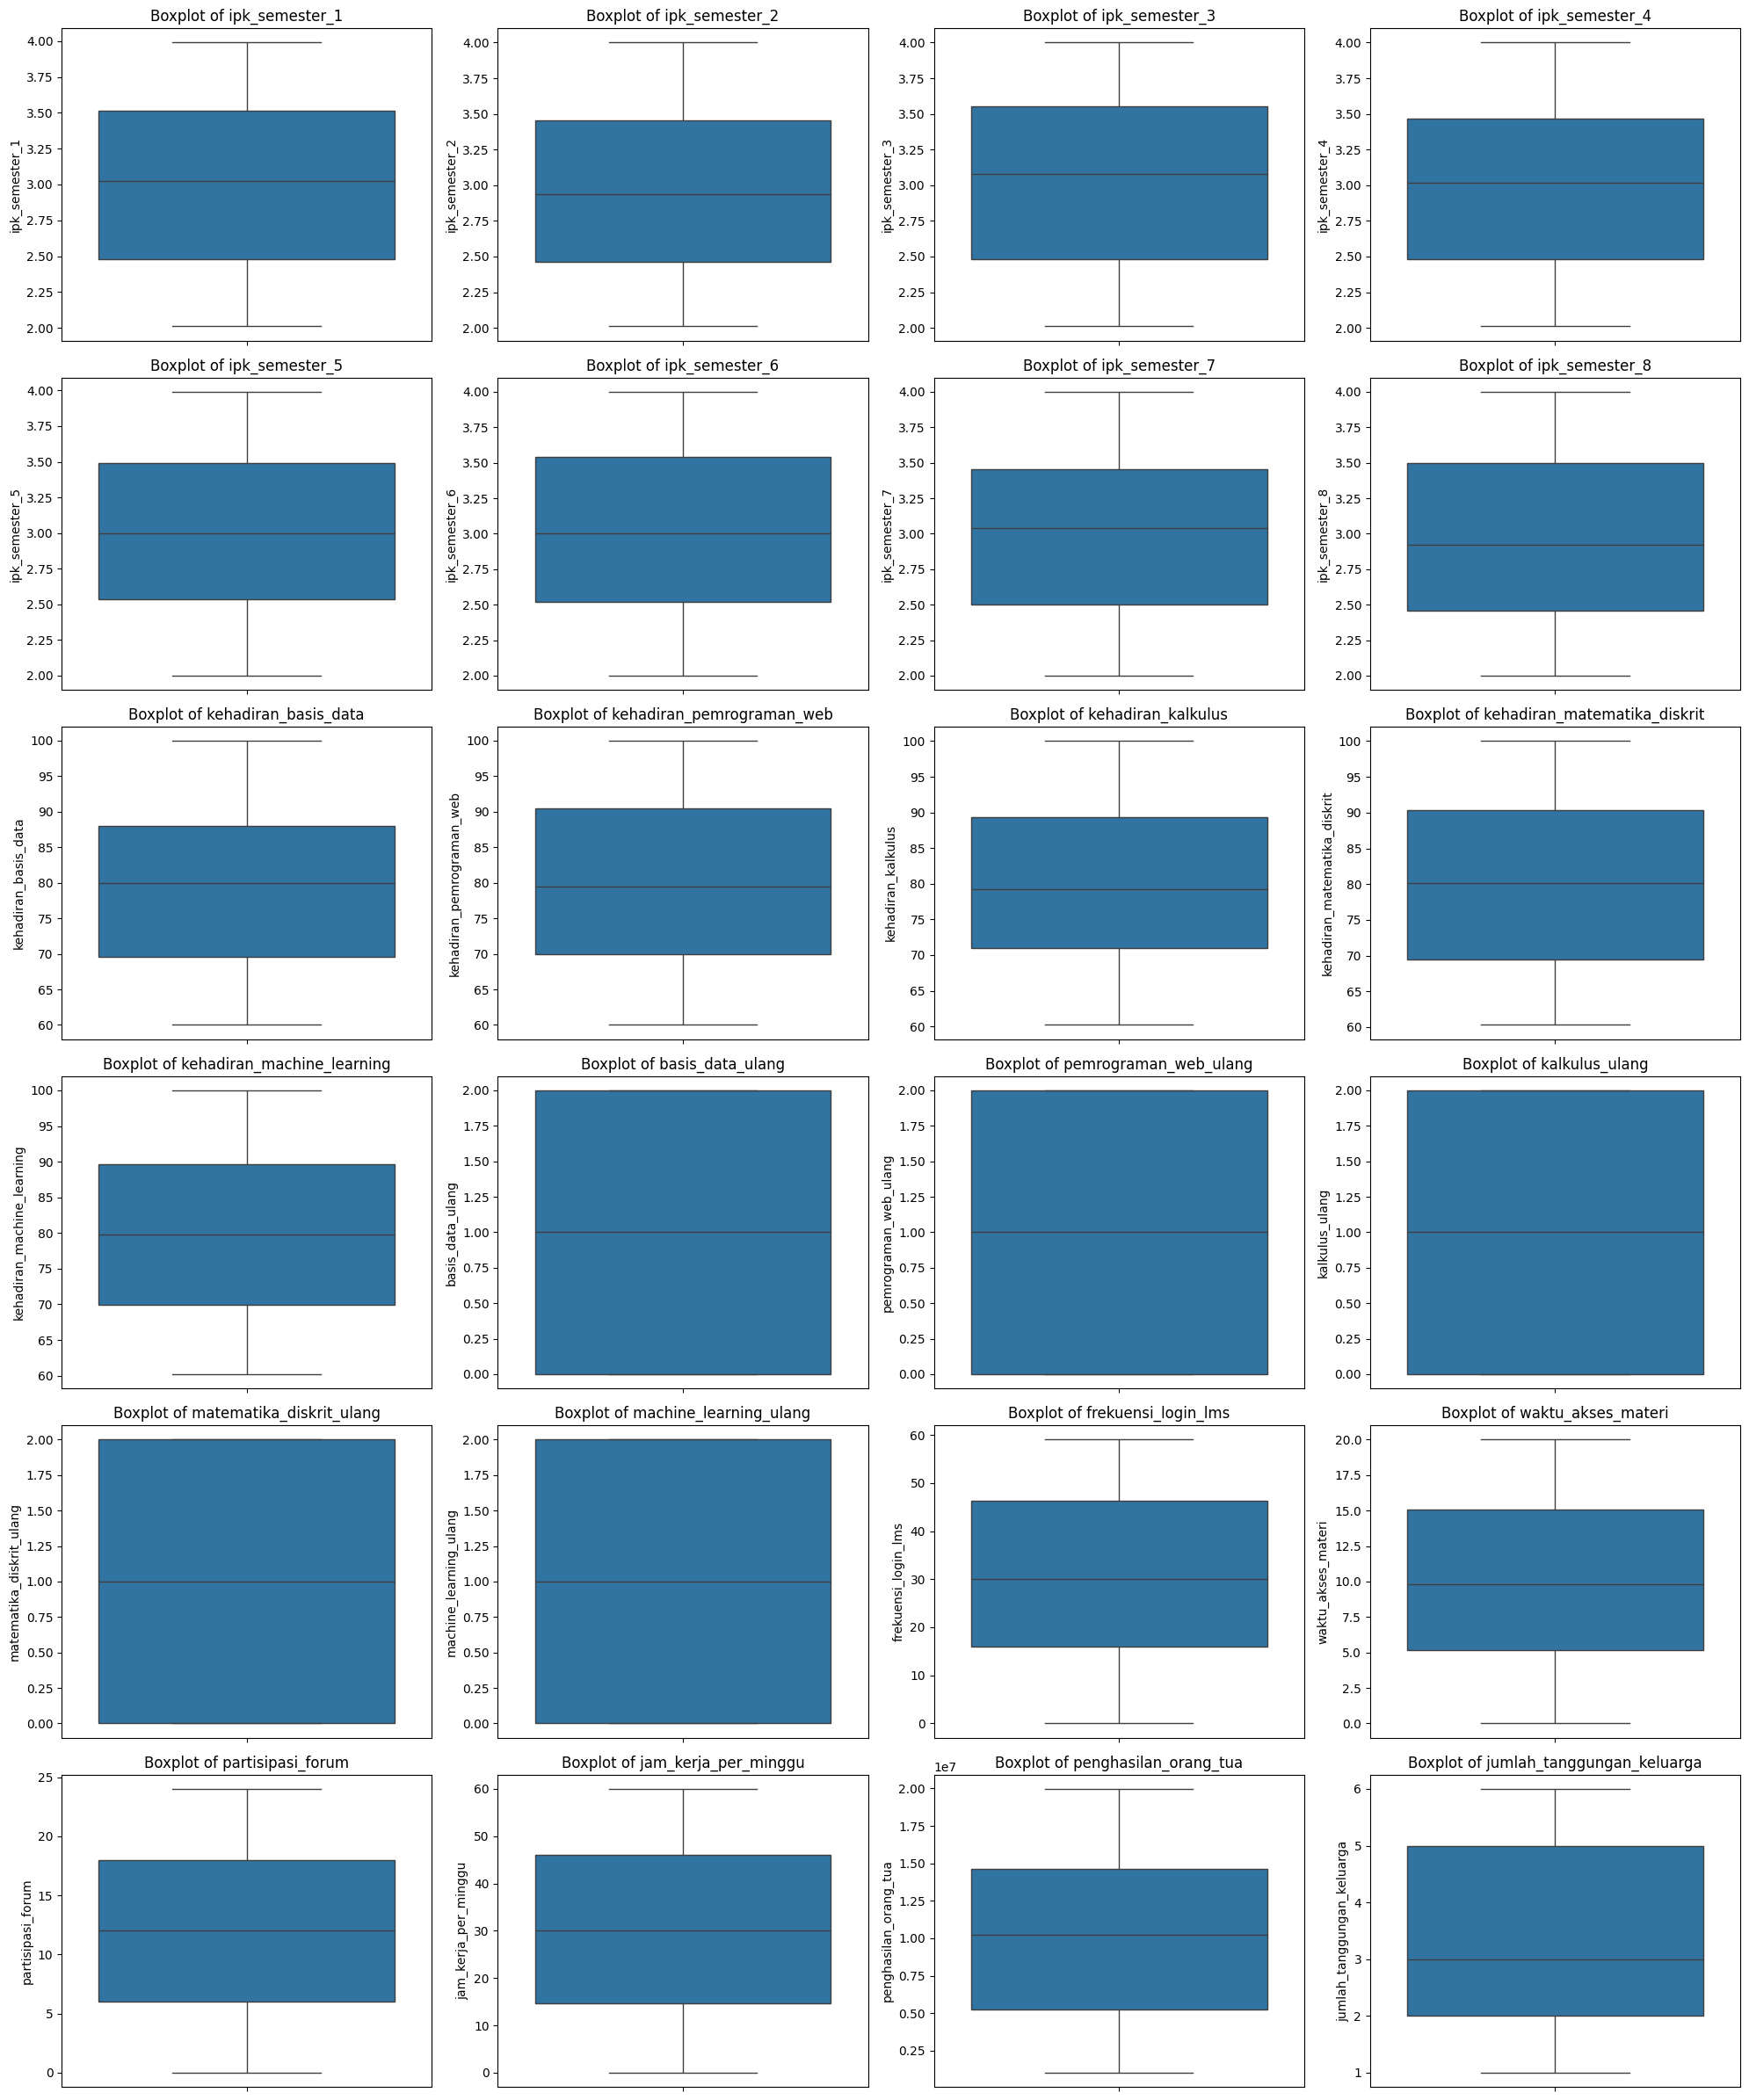

In [ ]:
# Kolom numerik yang akan diperiksa outliers nya
numerical_columns = ['ipk_semester_1', 'ipk_semester_2', 'ipk_semester_3', 'ipk_semester_4', 'ipk_semester_5', 'ipk_semester_6', 'ipk_semester_7', 'ipk_semester_8', 'kehadiran_basis_data', 'kehadiran_pemrograman_web', 'kehadiran_kalkulus', 'kehadiran_matematika_diskrit', 'kehadiran_machine_learning', 'basis_data_ulang', 'pemrograman_web_ulang', 'kalkulus_ulang', 'matematika_diskrit_ulang', 'machine_learning_ulang', 'frekuensi_login_lms', 'waktu_akses_materi', 'partisipasi_forum', 'jam_kerja_per_minggu', 'penghasilan_orang_tua', 'jumlah_tanggungan_keluarga']
# Periksa jumlah outliers untuk setiap kolom numerik
for col in numerical_columns:
    Q1 = mahasiswa_df[col].quantile(0.25)
    Q3 = mahasiswa_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = mahasiswa_df[(mahasiswa_df[col] < Q1 - 1.5 * IQR) | (mahasiswa_df[col] > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')

# Visualisasi boxplot dari kolom numerik untuk mendeteksi outlier
n_cols = 4
n_rows = math.ceil(len(numerical_columns) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=mahasiswa_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Seluruh kolom numerik dalam dataset mahasiswa tidak memiliki outlier menurut metode IQR (Interquartile Range).

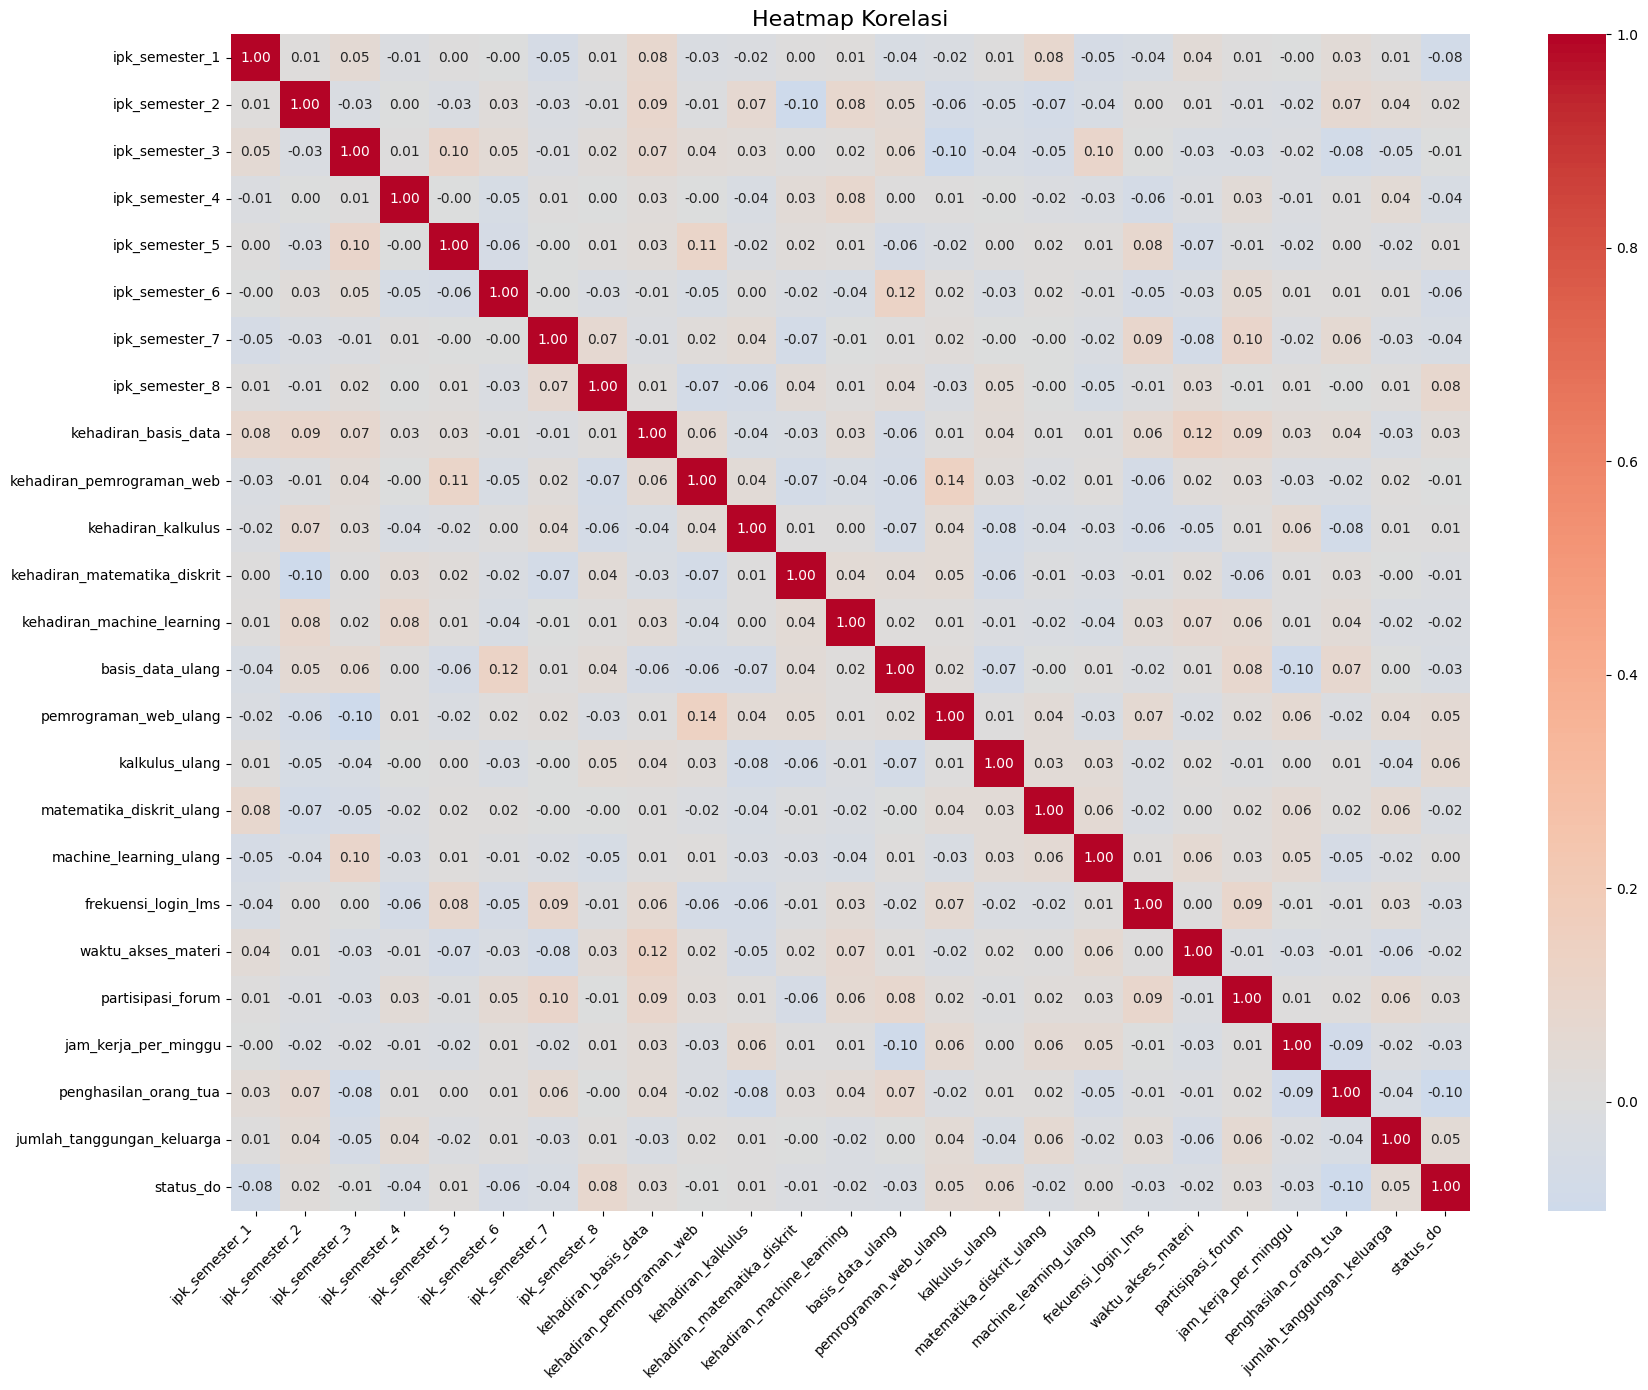

In [ ]:
# Korelasi antar variabel

plt.figure(figsize=(18, 14))  # Ukuran figure diperbesar
heatmap = sns.heatmap(
    mahasiswa_df[numerical_columns + ['status_do']].corr(),
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f"
)

# Rotasi label sumbu x dan y
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title('Heatmap Korelasi', fontsize=16)
plt.tight_layout()  # Otomatis mengatur padding
plt.show()

Berikut insight dari heatmap korelasi:

* Tidak terdapat korelasi kuat antara variabel-variabel numerik dengan status DO; korelasi tertinggi hanya sekitar ±0.1.
* IPK antar semester saling berkorelasi positif, namun lemah (maksimal ±0.1).
* Kehadiran di tiap mata kuliah memiliki korelasi negatif lemah terhadap pengulangan mata kuliah terkait.
* Frekuensi login LMS dan waktu akses materi memiliki korelasi positif dengan IPK semester akhir (±0.1), namun tetap lemah.
* Faktor sosial ekonomi seperti penghasilan orang tua atau jumlah tanggungan keluarga memiliki korelasi sangat rendah terhadap status DO.




## Analisis Variabel Target


=== DISTRIBUSI TARGET ===
status_do
0    0.796
1    0.204
Name: proportion, dtype: float64


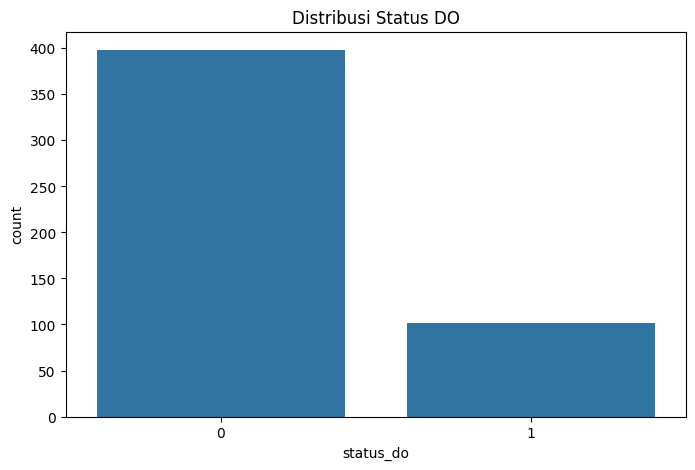

In [ ]:
# Distribusi kelas target
print("\n=== DISTRIBUSI TARGET ===")
print(mahasiswa_df['status_do'].value_counts(normalize=True))

# Visualisasi
plt.figure(figsize=(8,5))
sns.countplot(x='status_do', data=mahasiswa_df)
plt.title('Distribusi Status DO')
plt.show()

Berikut insight dari visualisasi distribusi variabel target status DO:

* Mayoritas mahasiswa tidak mengalami DO, yaitu sekitar 79,6% (label 0).
* Hanya sekitar 20,4% mahasiswa yang mengalami DO (label 1).
* Data target bersifat imbalanced, sehingga perlu dipertimbangkan penanganan ketidakseimbangan ini (misalnya dengan resampling) saat membangun model prediktif.


# **Data Preprocessing**

## Normalisasi

In [ ]:
# Normalisasi Untuk Kolom Numerik
# Buat salinan sebelum scaling
mahasiswa_df_copy = mahasiswa_df.copy()

# Inisialisasi dan terapkan MinMaxScaler
scaler = MinMaxScaler()
mahasiswa_df_copy[numerical_columns] = scaler.fit_transform(mahasiswa_df_copy[numerical_columns])


In [ ]:
mahasiswa_df_copy.head()

,nim,ipk_semester_1,ipk_semester_2,ipk_semester_3,ipk_semester_4,ipk_semester_5,ipk_semester_6,ipk_semester_7,ipk_semester_8,kehadiran_basis_data,...,machine_learning_ulang,frekuensi_login_lms,waktu_akses_materi,partisipasi_forum,status_pekerjaan,jam_kerja_per_minggu,penghasilan_orang_tua,jumlah_tanggungan_keluarga,beasiswa,status_do
0,G1A018001,0.373737,0.698492,0.180905,0.517588,0.261307,0.830,0.675,0.285,0.573935,...,1.0,0.474576,0.345,0.916667,paruh_waktu,0.750000,0.979910,1.0,ya,0
1,G1A018002,0.954545,0.532663,0.537688,0.477387,0.246231,0.765,0.795,0.805,0.807018,...,0.0,0.355932,0.995,0.291667,full_time,0.066667,0.799037,1.0,ya,0
2,G1A018003,0.732323,0.306533,0.874372,0.020101,0.909548,0.575,0.250,0.995,0.761905,...,1.0,0.440678,0.770,0.958333,tidak_bekerja,0.950000,0.490352,0.4,tidak,0
3,G1A018004,0.601010,0.814070,0.728643,0.336683,0.251256,0.955,0.625,0.030,0.155388,...,0.5,0.152542,0.760,0.541667,paruh_waktu,0.983333,0.750785,0.2,tidak,0
4,G1A018005,0.151515,0.683417,0.804020,0.376884,0.271357,0.200,0.570,0.895,0.150376,...,0.0,0.254237,0.955,0.208333,tidak_bekerja,0.383333,0.751743,0.4,tidak,1


Data telah dinormalisasi menggunakan MinMaxScaler, sehingga seluruh kolom numerik memiliki nilai antara 0 hingga 1. Contohnya, ipk_semester_1 yang sebelumnya bernilai 2.80–3.90 kini menjadi 0.15–0.95. Hal ini membuat skala antar fitur menjadi seragam dan cocok untuk digunakan dalam algoritma machine learning yang sensitif terhadap perbedaan skala. Nilai kategorikal seperti status_pekerjaan dan beasiswa belum diubah karena hanya kolom numerik yang distandarisasi.

## Encoding

In [ ]:
# One-hot encoding kolom status_pekerjaan dengan dtype=int dan drop_first untuk dummy trap
encoded_df = pd.get_dummies(mahasiswa_df_copy['status_pekerjaan'],
                             prefix='pekerjaan',
                             drop_first=True,
                             dtype=int)

# Gabungkan kembali ke dataframe utama
mahasiswa_df_copy = pd.concat([mahasiswa_df_copy.drop('status_pekerjaan', axis=1), encoded_df], axis=1)


In [ ]:
mahasiswa_df_copy.head()

,nim,ipk_semester_1,ipk_semester_2,ipk_semester_3,ipk_semester_4,ipk_semester_5,ipk_semester_6,ipk_semester_7,ipk_semester_8,kehadiran_basis_data,...,frekuensi_login_lms,waktu_akses_materi,partisipasi_forum,jam_kerja_per_minggu,penghasilan_orang_tua,jumlah_tanggungan_keluarga,beasiswa,status_do,pekerjaan_paruh_waktu,pekerjaan_tidak_bekerja
0,G1A018001,0.373737,0.698492,0.180905,0.517588,0.261307,0.830,0.675,0.285,0.573935,...,0.474576,0.345,0.916667,0.750000,0.979910,1.0,ya,0,1,0
1,G1A018002,0.954545,0.532663,0.537688,0.477387,0.246231,0.765,0.795,0.805,0.807018,...,0.355932,0.995,0.291667,0.066667,0.799037,1.0,ya,0,0,0
2,G1A018003,0.732323,0.306533,0.874372,0.020101,0.909548,0.575,0.250,0.995,0.761905,...,0.440678,0.770,0.958333,0.950000,0.490352,0.4,tidak,0,0,1
3,G1A018004,0.601010,0.814070,0.728643,0.336683,0.251256,0.955,0.625,0.030,0.155388,...,0.152542,0.760,0.541667,0.983333,0.750785,0.2,tidak,0,1,0
4,G1A018005,0.151515,0.683417,0.804020,0.376884,0.271357,0.200,0.570,0.895,0.150376,...,0.254237,0.955,0.208333,0.383333,0.751743,0.4,tidak,1,0,1


In [ ]:
le = LabelEncoder()
mahasiswa_df_copy['beasiswa'] = le.fit_transform(mahasiswa_df_copy['beasiswa'])


In [ ]:
mahasiswa_df_copy.head()

,nim,ipk_semester_1,ipk_semester_2,ipk_semester_3,ipk_semester_4,ipk_semester_5,ipk_semester_6,ipk_semester_7,ipk_semester_8,kehadiran_basis_data,...,frekuensi_login_lms,waktu_akses_materi,partisipasi_forum,jam_kerja_per_minggu,penghasilan_orang_tua,jumlah_tanggungan_keluarga,beasiswa,status_do,pekerjaan_paruh_waktu,pekerjaan_tidak_bekerja
0,G1A018001,0.373737,0.698492,0.180905,0.517588,0.261307,0.830,0.675,0.285,0.573935,...,0.474576,0.345,0.916667,0.750000,0.979910,1.0,1,0,1,0
1,G1A018002,0.954545,0.532663,0.537688,0.477387,0.246231,0.765,0.795,0.805,0.807018,...,0.355932,0.995,0.291667,0.066667,0.799037,1.0,1,0,0,0
2,G1A018003,0.732323,0.306533,0.874372,0.020101,0.909548,0.575,0.250,0.995,0.761905,...,0.440678,0.770,0.958333,0.950000,0.490352,0.4,0,0,0,1
3,G1A018004,0.601010,0.814070,0.728643,0.336683,0.251256,0.955,0.625,0.030,0.155388,...,0.152542,0.760,0.541667,0.983333,0.750785,0.2,0,0,1,0
4,G1A018005,0.151515,0.683417,0.804020,0.376884,0.271357,0.200,0.570,0.895,0.150376,...,0.254237,0.955,0.208333,0.383333,0.751743,0.4,0,1,0,1


Data kategorikal berhasil diubah ke format numerik:

* Kolom beasiswa telah di-label encoding: nilai "ya" menjadi 1 dan "tidak" menjadi 0, sehingga bisa digunakan dalam model.
* Kolom status\_pekerjaan telah diubah dengan one-hot encoding menjadi tiga kolom baru: pekerjaan\_full\_time, pekerjaan\_paruh\_waktu, dan pekerjaan\_tidak\_bekerja. Setiap baris hanya memiliki satu kolom bernilai True (atau 1 setelah konversi), mewakili jenis pekerjaan mahasiswa.


## Feature Selection

In [ ]:
X = mahasiswa_df_copy.drop(columns=['status_do', 'nim'])
y = mahasiswa_df_copy['status_do']

# Jalankan SelectKBest dengan k='all' untuk dapat skor semua fitur
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Buat DataFrame hasil skor
scores = pd.DataFrame({
    'Fitur': X.columns,
    'Skor': selector.scores_
}).sort_values(by='Skor', ascending=False)

# Tentukan threshold skor minimal
threshold = 1.0

# Filter fitur yang memenuhi threshold
fitur_terpilih = scores[scores['Skor'] >= threshold]['Fitur'].tolist()

print("Fitur yang dipilih berdasarkan threshold skor ≥ 1:")
print(fitur_terpilih)

# Jika ingin membuat subset data dengan fitur terpilih
X_terpilih = X[fitur_terpilih]

Fitur yang dipilih berdasarkan threshold skor ≥ 1:
['penghasilan_orang_tua', 'ipk_semester_1', 'ipk_semester_8', 'kalkulus_ulang', 'ipk_semester_6', 'pemrograman_web_ulang', 'jumlah_tanggungan_keluarga']


Fitur terpilih menunjukkan bahwa faktor akademik dan sosial-ekonomi berperan penting dalam memprediksi status DO mahasiswa. IPK semester 1, 6, dan 8 merefleksikan performa akademik yang menentukan kelulusan. Pengulangan mata kuliah seperti kalkulus dan pemrograman web mengindikasikan kesulitan belajar yang berkontribusi pada risiko DO. Selain itu, penghasilan orang tua dan jumlah tanggungan keluarga menandakan tekanan finansial yang mempengaruhi kemampuan mahasiswa menyelesaikan studi. Dengan fokus pada fitur-fitur ini, prediksi status DO dapat menjadi lebih akurat dan intervensi dapat diarahkan secara tepat.


# **Modelling**

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = mahasiswa_df_copy.drop(['status_do', 'nim'], axis=1)
y = mahasiswa_df_copy['status_do']

# Identifikasi kolom bertipe objek
object_cols = X.select_dtypes(include='object').columns

# Ubah kolom kategorikal menjadi numerik dengan one-hot encoding
X = pd.get_dummies(X, columns=object_cols, drop_first=True, dtype=int)

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tampilkan jumlah data total, data latih, dan data uji
print(f"Total data: {len(X)}, Train: {len(X_train)}, Test: {len(X_test)}")

Total data: 500, Train: 400, Test: 100


Dataset berisi 500 data yang dibagi menjadi 80% data latih (400) dan 20% data uji (100) untuk memastikan model dapat dilatih dan diuji secara optimal. Semua fitur kategorikal telah diubah menjadi format numerik menggunakan one-hot encoding agar model dapat memproses data dengan benar. Pembagian ini menjaga proporsi data agar hasil evaluasi model valid dan tidak bias.


In [ ]:
# Definisikan kumpulan model dengan parameter yang sudah ditentukan
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=100, random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss', random_state=42
    ),
    "K-Nearest Neighbors": KNeighborsClassifier(
        n_neighbors=10
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        random_state=42
    ),
}

* Mendefinisikan enam algoritma klasifikasi populer untuk perbandingan performa.
* Random Forest dengan 100 pohon dan paralelisasi proses (`n_jobs=-1`).
* XGBoost menggunakan metrik log loss untuk evaluasi dan random state tetap agar hasil reproducible.
* K-Nearest Neighbors menggunakan 10 tetangga terdekat.
* Decision Tree, Gradient Boosting, dan AdaBoost masing-masing dengan pengaturan random state agar konsisten.


In [ ]:
# Latih semua model yang telah didefinisikan dan simpan hasilnya
trained_models = {}

for model_name, model_instance in models.items():
    # Melatih model menggunakan data training yang sudah disiapkan
    model_instance.fit(X_train, y_train)

    # Simpan model yang sudah terlatih ke dictionary
    trained_models[model_name] = model_instance

    print(f"Model {model_name} berhasil dilatih.")

Model Random Forest berhasil dilatih.
Model XGBoost berhasil dilatih.
Model K-Nearest Neighbors berhasil dilatih.
Model Decision Tree berhasil dilatih.
Model Gradient Boosting berhasil dilatih.
Model AdaBoost berhasil dilatih.


Semua model yang sudah didefinisikan dilatih menggunakan data training yang telah diskalakan.

# **Evaluasi Model**

In [ ]:
# Evaluasi performa setiap model yang sudah dilatih
results = {}

for model_name, model_obj in trained_models.items():
    y_pred = model_obj.predict(X_test)

    # Hitung berbagai metrik evaluasi
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
    }

    print(f"Evaluasi model {model_name} selesai — Akurasi: {results[model_name]['Accuracy']:.4f}")

Evaluasi model Random Forest selesai — Akurasi: 0.8000
Evaluasi model XGBoost selesai — Akurasi: 0.8000
Evaluasi model K-Nearest Neighbors selesai — Akurasi: 0.7900
Evaluasi model Decision Tree selesai — Akurasi: 0.7100
Evaluasi model Gradient Boosting selesai — Akurasi: 0.7700
Evaluasi model AdaBoost selesai — Akurasi: 0.8000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Insight dari evaluasi model:

* Setiap model yang sudah dilatih diuji menggunakan data testing untuk mengukur performa dengan metrik utama: Accuracy, Precision, Recall, F1-Score, dan Confusion Matrix.
* Hasil akurasi terbaik dicapai oleh Random Forest, XGBoost, dan AdaBoost dengan nilai 0.80, diikuti K-Nearest Neighbors (0.79) dan Gradient Boosting (0.77), sementara Decision Tree memiliki akurasi terendah (0.71).



=== Hasil Evaluasi Model: Random Forest ===
Accuracy    : 0.8000
Precision   : 0.6400
Recall      : 0.8000
F1-Score    : 0.7111
----------------------------------------


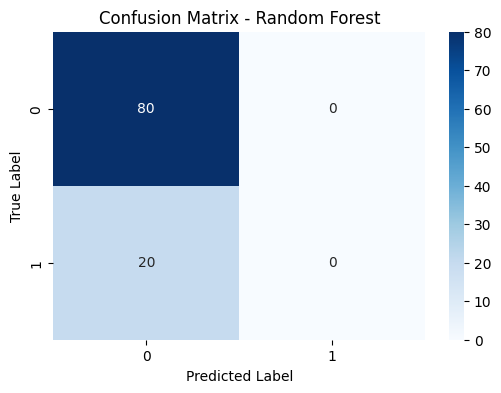


=== Hasil Evaluasi Model: XGBoost ===
Accuracy    : 0.8000
Precision   : 0.6400
Recall      : 0.8000
F1-Score    : 0.7111
----------------------------------------


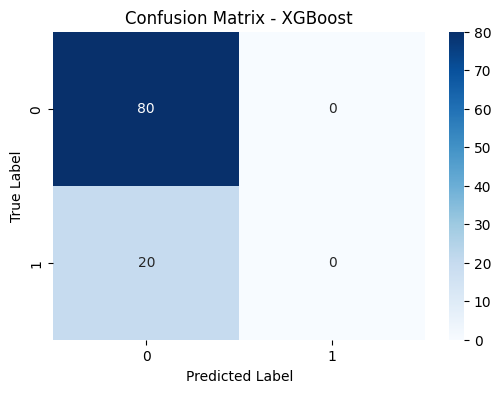


=== Hasil Evaluasi Model: AdaBoost ===
Accuracy    : 0.8000
Precision   : 0.7500
Recall      : 0.8000
F1-Score    : 0.7424
----------------------------------------


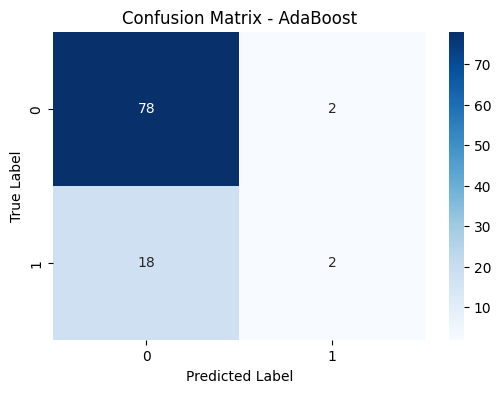

In [ ]:
for model_name, metrics in results.items():
    if metrics["Accuracy"] >= 0.80:
        print(f"\n=== Hasil Evaluasi Model: {model_name} ===")

        # Tampilkan metrik kecuali confusion matrix
        for metric_name, metric_value in metrics.items():
            if metric_name != "Confusion Matrix":
                print(f"{metric_name:12}: {metric_value:.4f}")

        print("-" * 40)

        # Visualisasi confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

### Insight Hasil Evaluasi Model

#### 1. Random Forest
- Memiliki akurasi sebesar **80%**, namun precision hanya **64%**.
- Recall yang tinggi (**80%**) menunjukkan model mampu menangkap banyak instance kelas positif.
- F1-Score sebesar **71%** mengindikasikan performa sedang, namun masih terdapat ketidakseimbangan antara precision dan recall.

#### 2. XGBoost
- Memiliki hasil evaluasi yang identik dengan Random Forest pada seluruh metrik.
- Menunjukkan bahwa model ini juga mengalami pola prediksi yang serupa, dengan performa moderat pada kelas positif.

#### 3. AdaBoost
- Akurasi tetap di angka **80%**, namun precision lebih tinggi (**75%**) dibanding dua model lainnya.
- F1-Score juga tertinggi di antara ketiganya (**74%**), menandakan keseimbangan yang lebih baik antara precision dan recall.
- Menunjukkan kinerja yang lebih baik dalam mengidentifikasi kelas positif dibanding Random Forest dan XGBoost.
